In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *

In [2]:
src = (ImageList.from_folder('../../Training_Data')
       .split_by_folder(train='Train', valid='Test')
       .label_from_folder())

In [3]:
src

LabelLists;

Train: LabelList (51259 items)
x: ImageList
Image (3, 128, 256),Image (3, 128, 256),Image (3, 128, 256),Image (3, 128, 256),Image (3, 128, 256)
y: CategoryList
human_,human_,human_,human_,human_
Path: ../../Training_Data;

Valid: LabelList (12850 items)
x: ImageList
Image (3, 128, 256),Image (3, 128, 256),Image (3, 128, 256),Image (3, 128, 256),Image (3, 128, 256)
y: CategoryList
human_,human_,human_,human_,human_
Path: ../../Training_Data;

Test: None

In [4]:
tfms = get_transforms(do_flip=False, max_rotate = 0,
    max_zoom = 0,
    max_lighting = 0,
    max_warp = 0,
    p_affine = 0,
    p_lighting =0)

In [5]:
data = (src.transform(tfms, size=(128,256))
        .databunch().normalize(imagenet_stats))

In [6]:
data

ImageDataBunch;

Train: LabelList (51259 items)
x: ImageList
Image (3, 128, 256),Image (3, 128, 256),Image (3, 128, 256),Image (3, 128, 256),Image (3, 128, 256)
y: CategoryList
human_,human_,human_,human_,human_
Path: ../../Training_Data;

Valid: LabelList (12850 items)
x: ImageList
Image (3, 128, 256),Image (3, 128, 256),Image (3, 128, 256),Image (3, 128, 256),Image (3, 128, 256)
y: CategoryList
human_,human_,human_,human_,human_
Path: ../../Training_Data;

Test: None

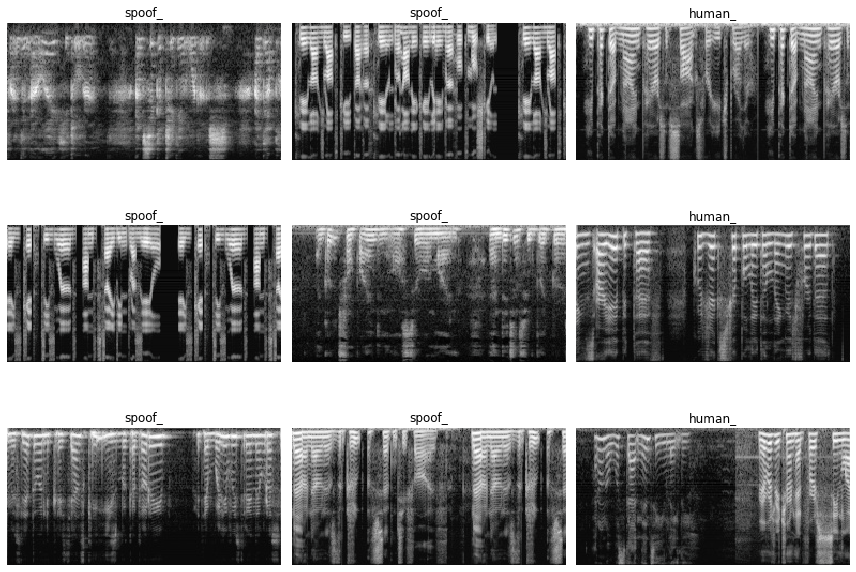

In [43]:
data.show_batch(rows=3, figsize=(12,9))

In [8]:
learn = cnn_learner(data, models.resnet34, metrics=[accuracy, error_rate])
learn.fit_one_cycle(4)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /home/ilya/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:13<00:00, 6681990.55it/s]


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.348723,0.310039,0.869416,0.130584,09:15
1,0.231109,0.192109,0.921946,0.078054,09:19
2,0.181536,0.151231,0.942412,0.057588,09:14
3,0.183749,0.146648,0.946226,0.053774,09:04


In [9]:
learn.save('stage-1')

In [10]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()

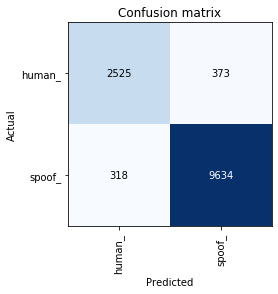

In [15]:
interp.plot_confusion_matrix()

In [7]:
data = (src.transform(tfms, size=256)
        .databunch(bs=32).normalize(imagenet_stats))
learn = cnn_learner(data, models.resnet34, metrics=[accuracy, error_rate])

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


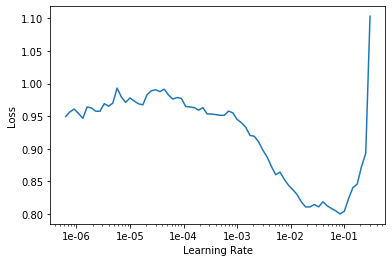

In [46]:
learn.lr_find()
learn.recorder.plot()

In [47]:
lr = 0.005
learn.fit_one_cycle(4, slice(lr))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.181600,0.141674,0.946459,0.053541,32:21
1,0.091666,0.073865,0.974397,0.025603,35:05
2,0.059260,0.061528,0.980700,0.019300,31:02
3,0.054543,0.054662,0.981634,0.018366,30:27


In [48]:
learn.save('stage-1')

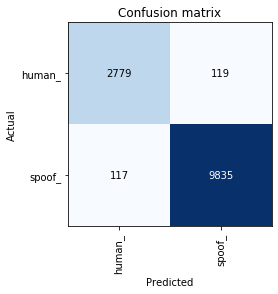

In [49]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
interp.plot_confusion_matrix()

In [8]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (51259 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
human_,human_,human_,human_,human_
Path: ../../Training_Data;

Valid: LabelList (12850 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
human_,human_,human_,human_,human_
Path: ../../Training_Data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(5e-6, 0.005/5))

epoch,train_loss,valid_loss,accuracy,error_rate,time
